# Algorithm for Data Processing

1. Start
2. Read .csv file.
3. Create separate files for each state.
4. Is forecast year=year observed?
5. If yes, go to step 6. If no, go to step 9.
6. n=number of duplicates in Internal Project ID.
If Internal Project ID is unavailable, find duplicates by some other method.
7. New columns for Percentage Error.
8. Percentage Error=1/n*(Forecast-Actual)/Forecast. END
9. years=forecast year- year observed.
10. growth rate= difference between two projections/number of years in between projections.
11. adjusted forecast=forecast AADT X growth rate X years. Go to step 7.


In [1]:
import pandas as pd
import numpy as np

In [129]:
flatdata=pd.read_csv("FlatData.csv")
flatdata.groupby('State').count() #summary of the data available

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 68: invalid start byte

In [4]:
#cleaned.groupby('State').count()

In [3]:
florida=flatdata[flatdata['State']==12]
michigan=flatdata[flatdata['State']==27]
minnesota=flatdata[flatdata['State']==28]
wisconsin=flatdata[flatdata['State']==58]
ohio=flatdata[flatdata['State']==41]
ohio.head()

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
0,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-2-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,37190,1.0,1994.0,6,", , RIC7119.08",2,NaN,2000,42310
1,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-2-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,45190,3.0,1994.0,6,", , RIC7119.08",2,NaN,2008,39760
2,IR71/US 30 interchange Modification,NaN,3.0,NaN,41.0,11378,41-3-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,12920,1.0,1994.0,6,", , RIC3017.2",3,NaN,2000,15780
3,IR71/US 30 interchange Modification,NaN,3.0,NaN,41.0,11378,41-3-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,17390,3.0,1994.0,6,", , RIC3017.2",3,NaN,2008,15630
4,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-4-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,37820,1.0,1994.0,6,", , RIC7118.78",4,NaN,2000,42450


In [4]:
#ohio[ohio['InternalProjectID'].isnull()]
flatdata[flatdata['InternalProjectID'].isnull()].groupby('State').count()
#flatdata[flatdata['Count'].isnull()].groupby('State').count()

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
State,,,,,,,,,,,,,,,,,,
12.0,143,0,0,0,0,143,143,143,143,143,143,143,143,143,143,143,143,143
41.0,1734,0,1736,0,0,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736,0,1736,1736


The above describes the number of records in our database that don't have any Internal Project ID. We have to analyse these differently. 

In [7]:
#cleaned=ohio[ohio['ForecastYear']==ohio['Year_ofObservation']]
#cleaned.head()


Looking at the Ohio dataset, we see that in the original excel worksheetthere is a column titled "Physical Works COmpleted On". If the Near Opening Year Count happens before this date, that means the count is taken when the project is not yet done. SO we have to exclude this value.

In [131]:
flatdata['DiffYear']=flatdata['ForecastYear']-flatdata['Year_ofObservation']

newflatdata=flatdata[flatdata['DiffYear']>=0] #to remove values whose counts are not applicable.

newflatdata=newflatdata[newflatdata['State']!=41]
newflatdata.groupby('State').count()
newflatdata.head()
flatdata[flatdata['DiffYear']>0]

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear
1,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-2-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,45190,3.0,1994.0,6,", , RIC7119.08",2,NaN,2008,39760,12.0
3,IR71/US 30 interchange Modification,NaN,3.0,NaN,41.0,11378,41-3-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,17390,3.0,1994.0,6,", , RIC3017.2",3,NaN,2008,15630,12.0
5,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-4-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,46060,3.0,1994.0,6,", , RIC7118.78",4,NaN,2008,39290,12.0
7,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-5-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,22090,3.0,1994.0,6,", , RIC3016.87",5,NaN,2008,18210,12.0
9,TUS-0036-15.730,NaN,3.0,NaN,41.0,19055,41-6-19055-TUS-0036-15.730,Tuscarawas,1,2020.0,11530,3.0,1999.0,6,", , TUS3615.73",6,NaN,2010,8960,10.0
11,LOR-0090-13.20,NaN,1.0,NaN,41.0,11385,41-7-11385-LOR-0090-13.20,Lorain,1,2022.0,94850,3.0,2000.0,6,", , LOR9013",7,NaN,2008,59970,14.0
13,LOR-0090-13.20,NaN,1.0,NaN,41.0,11385,41-8-11385-LOR-0090-13.20,Lorain,1,2022.0,76040,3.0,2000.0,6,", , LOR9013.2",8,NaN,2008,52020,14.0
15,LOR-0090-13.20,NaN,1.0,NaN,41.0,11385,41-9-11385-LOR-0090-13.20,Lorain,1,2022.0,73820,3.0,2000.0,6,", , LOR9015.65",9,NaN,2008,53590,14.0
17,LOR-0090-13.20,NaN,3.0,NaN,41.0,11385,41-10-11385-LOR-0090-13.20,Lorain,1,2022.0,32960,3.0,2000.0,6,", , LOR5720.06",10,NaN,2008,45300,14.0
19,LOR-0090-13.20,NaN,4.0,NaN,41.0,11385,41-11-11385-LOR-0090-13.20,Lorain,1,2022.0,24320,3.0,2000.0,6,", , LOR5720.33",11,NaN,2008,18020,14.0


Now, newflatdata dataframe contains the projects that have actual counts on or after the forecast year. Note it doesn't include Ohio, since that have to be analysed separately.

#### Here, InternalProjectID are unique identifiers. 

## Separate the newflatdata 

The first condition to be fulfilled is whether the DiffYear is zero. If it is zero, then we don't need to adjust the forecast.

If the DiffYear is not zero, adjust by the aforementioned formula.

In [30]:
estimation=newflatdata[newflatdata['DiffYear']==0]
estimation.groupby('State').count()
#estimation

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear
State,,,,,,,,,,,,,,,,,,,
12.0,840,653,697,0,697,840,840,840,840,840,840,838,832,524,840,840,840,840,840
27.0,8,8,8,0,8,8,8,8,8,8,8,8,8,7,8,8,8,8,8
28.0,2100,1549,0,0,2100,2100,1911,2100,2100,2100,0,2100,2100,2100,2100,0,2100,2100,2100
58.0,0,0,457,0,457,457,457,457,457,457,457,457,457,0,457,0,457,457,457


In [31]:
estimation2=newflatdata[newflatdata['DiffYear']>0]
estimation2.groupby('State').count()

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear
State,,,,,,,,,,,,,,,,,,,
12.0,1108,1034,1108,0,1108,1108,1108,1108,1108,1108,1108,1104,1096,574,1108,1108,1108,1108,1108
27.0,25,25,25,0,25,25,25,25,25,25,25,25,25,20,25,25,25,25,25
28.0,34,4,0,0,34,34,34,34,34,34,0,34,34,34,34,0,34,34,34


In [127]:
estimation2=estimation2[estimation2['ForecastYearType']!=3] #taking the opening year forecast only.
estimation2.groupby('State').count()

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear
State,,,,,,,,,,,,,,,,,,,
12.0,470,434,470,0,470,470,470,470,470,470,470,468,466,228,470,470,470,470,470
27.0,14,14,14,0,14,14,14,14,14,14,14,14,14,12,14,14,14,14,14
28.0,34,4,0,0,34,34,34,34,34,34,0,34,34,34,34,0,34,34,34


In [10]:
project_weight = estimation['InternalProjectID'].groupby(estimation['InternalProjectID']).count().to_frame(name='n')
project_weight

,n
InternalProjectID,
1663,5
1693,5
1745,12
1760,5
1864,1
1905,2
1929,23
1939,4
1959,8


In [33]:
newestimation1 = pd.merge(estimation,project_weight, left_on='InternalProjectID', right_index=True)
newestimation1

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,...,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear,n
12413,NaN,NaN,3.0,NaN,58.0,1663,58-6231-1663-,Washington,1,2010.0,...,1.0,2007.0,1,NaN,6231,NaN,2010,3700,0.0,5
12414,NaN,NaN,3.0,NaN,58.0,1663,58-6232-1663-,Washington,1,2010.0,...,1.0,2007.0,1,NaN,6232,NaN,2010,5500,0.0,5
12415,NaN,NaN,3.0,NaN,58.0,1663,58-6233-1663-,Washington,1,2010.0,...,1.0,2007.0,1,NaN,6233,NaN,2010,2800,0.0,5
12416,NaN,NaN,3.0,NaN,58.0,1663,58-6234-1663-,Washington,1,2010.0,...,1.0,2007.0,1,NaN,6234,NaN,2010,2500,0.0,5
12417,NaN,NaN,3.0,NaN,58.0,1663,58-6235-1663-,Washington,1,2010.0,...,1.0,2007.0,1,NaN,6235,NaN,2010,3500,0.0,5
12418,NaN,NaN,4.0,NaN,58.0,2015,58-6236-2015-,Washington,1,2007.0,...,1.0,2005.0,1,NaN,6236,NaN,2007,14000,0.0,3
12419,NaN,NaN,4.0,NaN,58.0,2015,58-6237-2015-,Washington,1,2007.0,...,1.0,2005.0,1,NaN,6237,NaN,2007,14700,0.0,3
12420,NaN,NaN,4.0,NaN,58.0,2015,58-6238-2015-,Washington,1,2007.0,...,1.0,2005.0,1,NaN,6238,NaN,2007,16900,0.0,3
12421,NaN,NaN,0.0,NaN,58.0,2126,58-6239-2126-,Washington,1,2007.0,...,1.0,2006.0,1,NaN,6239,NaN,2007,1900,0.0,10
12423,NaN,NaN,3.0,NaN,58.0,2126,58-6241-2126-,Washington,1,2007.0,...,1.0,2006.0,1,NaN,6241,NaN,2007,5100,0.0,10


In [12]:
project_weight2 = estimation2['InternalProjectID'].groupby(estimation2['InternalProjectID']).count().to_frame(name='n')
newestimation2 = pd.merge(estimation2,project_weight2, left_on='InternalProjectID', right_index=True)
newestimation2

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,...,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear,n
13416,TH 35 and Little Canada Road,NaN,NaN,NaN,28.0,TA-M286,28-7234-TA-M286-TH 35 and Little Canada Road,Ramsey,1,2005.0,...,NaN,1981.0,1,", , , Little Canada RdWest of Co Rd CEB",7234,NaN,2004,20000,1.0,4
13417,TH 35 and Little Canada Road,NaN,NaN,NaN,28.0,TA-M286,28-7235-TA-M286-TH 35 and Little Canada Road,Ramsey,1,2005.0,...,NaN,1981.0,1,", , , WB",7235,NaN,2004,20000,1.0,4
13418,TH 35 and Little Canada Road,NaN,NaN,NaN,28.0,TA-M286,28-7236-TA-M286-TH 35 and Little Canada Road,Ramsey,1,2005.0,...,NaN,1981.0,1,", , , Little Canada RdBetween Co Rd C & Lakesh...",7236,NaN,2004,20000,1.0,4
13419,TH 35 and Little Canada Road,NaN,NaN,NaN,28.0,TA-M286,28-7237-TA-M286-TH 35 and Little Canada Road,Ramsey,1,2005.0,...,NaN,1981.0,1,", , , WB",7237,NaN,2004,20000,1.0,4
13856,TH 494 from TH 12 (394) to TH 55,NaN,NaN,NaN,28.0,TA-M358,28-7674-TA-M358-TH 494 from TH 12 (394) to TH 55,Hennepin,1,2010.0,...,NaN,1987.0,1,", , , I-494Between I-394NB",7674,NaN,1990,27000,20.0,2
13857,TH 494 from TH 12 (394) to TH 55,NaN,NaN,NaN,28.0,TA-M358,28-7675-TA-M358-TH 494 from TH 12 (394) to TH 55,Hennepin,1,2010.0,...,NaN,1987.0,1,", , , SB",7675,NaN,1990,27000,20.0,2
14058,TH 55 From Western City Limits To TH61,NaN,NaN,NaN,28.0,TA-M300,28-7876-TA-M300-TH 55 From Western City Limits...,Dakota,1,2008.0,...,NaN,1983.0,1,", , , TH 55West Of Pine StEB",7876,NaN,1986,14000,22.0,4
14059,TH 55 From Western City Limits To TH61,NaN,NaN,NaN,28.0,TA-M300,28-7877-TA-M300-TH 55 From Western City Limits...,Dakota,1,2008.0,...,NaN,1983.0,1,", , , WB",7877,NaN,1986,14000,22.0,4
14060,TH 55 From Western City Limits To TH61,NaN,NaN,NaN,28.0,TA-M300,28-7878-TA-M300-TH 55 From Western City Limits...,Dakota,1,2008.0,...,NaN,1983.0,1,", , , TH 55Between Pine StEB",7878,NaN,1986,14000,22.0,4
14061,TH 55 From Western City Limits To TH61,NaN,NaN,NaN,28.0,TA-M300,28-7879-TA-M300-TH 55 From Western City Limits...,Dakota,1,2008.0,...,NaN,1983.0,1,", , , WB",7879,NaN,1986,14000,22.0,4


In [18]:
project_weight2.describe()

,n
count,198.000000
mean,2.631313
std,1.701128
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,18.000000


So the data files that are ready to be analysed are newestimation1 and newestimation2. newestimation2 needs to be adjusted for the difference in forecast year and observed year. Need to take a growth rate and multiply the forecast with growth rate and number of years.

## Segment level Forecasting

### Take the Opening Year Forecasts only. Create new column with Error, Weighted PercentError and Absolute Percent Error.


In [90]:
new_estimation1=newestimation1[newestimation1['ForecastYearType']==1.0]
list(new_estimation1)

['BriefDescription',
 'Length_miles',
 'FunctionalClass',
 'ImprovementType',
 'State',
 'InternalProjectID',
 'main_ProjectInformation_ProjectID',
 'County',
 'TollType',
 'ForecastYear',
 'TrafficForecast',
 'ForecastYearType',
 'YearForecastProduced',
 'ForecastMethodology',
 'SegmentDescription',
 'main_TrafficForecast_ProjectID',
 'SegmentID',
 'Year_ofObservation',
 'Count',
 'DiffYear',
 'n']

In [89]:
#new_estimation1['Error']=new_estimation1['TrafficForecast']-new_estimation1['Count']
#new_estimation1['PercentError']=new_estimation1['Error']/new_estimation1['TrafficForecast']
#new_estimation1

In [102]:
new_estimation1.assign(Error=new_estimation1['TrafficForecast']-new_estimation1['Count']
                      )
#new_estimation1.assign(PercentError=new_estimation1['Error']/new_estimation1['TrafficForecast'])

new_estimation1=newestimation1.drop(['Length_miles','ImprovementType','main_ProjectInformation_ProjectID',
                                    'County'],axis=1)

new_estimation1

,BriefDescription,FunctionalClass,State,InternalProjectID,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear,n
12413,NaN,3.0,58.0,1663,1,2010.0,5300,1.0,2007.0,1,NaN,6231,NaN,2010,3700,0.0,5
12414,NaN,3.0,58.0,1663,1,2010.0,7400,1.0,2007.0,1,NaN,6232,NaN,2010,5500,0.0,5
12415,NaN,3.0,58.0,1663,1,2010.0,4150,1.0,2007.0,1,NaN,6233,NaN,2010,2800,0.0,5
12416,NaN,3.0,58.0,1663,1,2010.0,3700,1.0,2007.0,1,NaN,6234,NaN,2010,2500,0.0,5
12417,NaN,3.0,58.0,1663,1,2010.0,4500,1.0,2007.0,1,NaN,6235,NaN,2010,3500,0.0,5
12418,NaN,4.0,58.0,2015,1,2007.0,18800,1.0,2005.0,1,NaN,6236,NaN,2007,14000,0.0,3
12419,NaN,4.0,58.0,2015,1,2007.0,18200,1.0,2005.0,1,NaN,6237,NaN,2007,14700,0.0,3
12420,NaN,4.0,58.0,2015,1,2007.0,19600,1.0,2005.0,1,NaN,6238,NaN,2007,16900,0.0,3
12421,NaN,0.0,58.0,2126,1,2007.0,1300,1.0,2006.0,1,NaN,6239,NaN,2007,1900,0.0,10
12423,NaN,3.0,58.0,2126,1,2007.0,4500,1.0,2006.0,1,NaN,6241,NaN,2007,5100,0.0,10


In [104]:
new_estimation1=new_estimation1.assign(Error=new_estimation1['TrafficForecast']-new_estimation1['Count']
                      )
new_estimation1

,BriefDescription,FunctionalClass,State,InternalProjectID,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear,n,Error
12413,NaN,3.0,58.0,1663,1,2010.0,5300,1.0,2007.0,1,NaN,6231,NaN,2010,3700,0.0,5,1600
12414,NaN,3.0,58.0,1663,1,2010.0,7400,1.0,2007.0,1,NaN,6232,NaN,2010,5500,0.0,5,1900
12415,NaN,3.0,58.0,1663,1,2010.0,4150,1.0,2007.0,1,NaN,6233,NaN,2010,2800,0.0,5,1350
12416,NaN,3.0,58.0,1663,1,2010.0,3700,1.0,2007.0,1,NaN,6234,NaN,2010,2500,0.0,5,1200
12417,NaN,3.0,58.0,1663,1,2010.0,4500,1.0,2007.0,1,NaN,6235,NaN,2010,3500,0.0,5,1000
12418,NaN,4.0,58.0,2015,1,2007.0,18800,1.0,2005.0,1,NaN,6236,NaN,2007,14000,0.0,3,4800
12419,NaN,4.0,58.0,2015,1,2007.0,18200,1.0,2005.0,1,NaN,6237,NaN,2007,14700,0.0,3,3500
12420,NaN,4.0,58.0,2015,1,2007.0,19600,1.0,2005.0,1,NaN,6238,NaN,2007,16900,0.0,3,2700
12421,NaN,0.0,58.0,2126,1,2007.0,1300,1.0,2006.0,1,NaN,6239,NaN,2007,1900,0.0,10,-600
12423,NaN,3.0,58.0,2126,1,2007.0,4500,1.0,2006.0,1,NaN,6241,NaN,2007,5100,0.0,10,-600


In [114]:
new_estimation2=new_estimation1.assign(PercentError=100*new_estimation1['Error']/new_estimation1['TrafficForecast'])
new_estimation2

,BriefDescription,FunctionalClass,State,InternalProjectID,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear,n,Error,PercentError
12413,NaN,3.0,58.0,1663,1,2010.0,5300,1.0,2007.0,1,NaN,6231,NaN,2010,3700,0.0,5,1600,30.188679
12414,NaN,3.0,58.0,1663,1,2010.0,7400,1.0,2007.0,1,NaN,6232,NaN,2010,5500,0.0,5,1900,25.675676
12415,NaN,3.0,58.0,1663,1,2010.0,4150,1.0,2007.0,1,NaN,6233,NaN,2010,2800,0.0,5,1350,32.530120
12416,NaN,3.0,58.0,1663,1,2010.0,3700,1.0,2007.0,1,NaN,6234,NaN,2010,2500,0.0,5,1200,32.432432
12417,NaN,3.0,58.0,1663,1,2010.0,4500,1.0,2007.0,1,NaN,6235,NaN,2010,3500,0.0,5,1000,22.222222
12418,NaN,4.0,58.0,2015,1,2007.0,18800,1.0,2005.0,1,NaN,6236,NaN,2007,14000,0.0,3,4800,25.531915
12419,NaN,4.0,58.0,2015,1,2007.0,18200,1.0,2005.0,1,NaN,6237,NaN,2007,14700,0.0,3,3500,19.230769
12420,NaN,4.0,58.0,2015,1,2007.0,19600,1.0,2005.0,1,NaN,6238,NaN,2007,16900,0.0,3,2700,13.775510
12421,NaN,0.0,58.0,2126,1,2007.0,1300,1.0,2006.0,1,NaN,6239,NaN,2007,1900,0.0,10,-600,-46.153846
12423,NaN,3.0,58.0,2126,1,2007.0,4500,1.0,2006.0,1,NaN,6241,NaN,2007,5100,0.0,10,-600,-13.333333


### Weight

The weight value is calculated based on the number of segments in each individual projects. 

### Segment Level Analysis
If we take Absolute Value of the Weighted Percent Error, we will find the accuracy on a segment level. 

In [115]:
estimation_result1=new_estimation2.assign(WeightedPE=new_estimation2['PercentError']/new_estimation2['n'])
estimation_result1

,BriefDescription,FunctionalClass,State,InternalProjectID,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,DiffYear,n,Error,PercentError,WeightedPE
12413,NaN,3.0,58.0,1663,1,2010.0,5300,1.0,2007.0,1,NaN,6231,NaN,2010,3700,0.0,5,1600,30.188679,6.037736
12414,NaN,3.0,58.0,1663,1,2010.0,7400,1.0,2007.0,1,NaN,6232,NaN,2010,5500,0.0,5,1900,25.675676,5.135135
12415,NaN,3.0,58.0,1663,1,2010.0,4150,1.0,2007.0,1,NaN,6233,NaN,2010,2800,0.0,5,1350,32.530120,6.506024
12416,NaN,3.0,58.0,1663,1,2010.0,3700,1.0,2007.0,1,NaN,6234,NaN,2010,2500,0.0,5,1200,32.432432,6.486486
12417,NaN,3.0,58.0,1663,1,2010.0,4500,1.0,2007.0,1,NaN,6235,NaN,2010,3500,0.0,5,1000,22.222222,4.444444
12418,NaN,4.0,58.0,2015,1,2007.0,18800,1.0,2005.0,1,NaN,6236,NaN,2007,14000,0.0,3,4800,25.531915,8.510638
12419,NaN,4.0,58.0,2015,1,2007.0,18200,1.0,2005.0,1,NaN,6237,NaN,2007,14700,0.0,3,3500,19.230769,6.410256
12420,NaN,4.0,58.0,2015,1,2007.0,19600,1.0,2005.0,1,NaN,6238,NaN,2007,16900,0.0,3,2700,13.775510,4.591837
12421,NaN,0.0,58.0,2126,1,2007.0,1300,1.0,2006.0,1,NaN,6239,NaN,2007,1900,0.0,10,-600,-46.153846,-4.615385
12423,NaN,3.0,58.0,2126,1,2007.0,4500,1.0,2006.0,1,NaN,6241,NaN,2007,5100,0.0,10,-600,-13.333333,-1.333333


In [126]:
estimation_result2=estimation_result1.assign(AbsPE=np.abs(estimation_result1['WeightedPE'])) #segment level PE
#analysis=estimation_result2.AbsPE.groupby(estimation_result2['InternalProjectID']).sum()
estimation_result2.AbsPE.describe()

count    3265.000000
mean        3.953928
std         8.233295
min         0.000000
25%         0.531538
50%         1.632191
75%         4.006047
max       127.647059
Name: AbsPE, dtype: float64

In [55]:
%matplotlib inline

In [108]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

(array([  72.,  121.,   94.,   52.,   35.,   24.,   21.,   11.,    7.,
           8.,    3.,    4.,    7.,    3.,    0.,    0.,    1.,    2.,
           1.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   0.        ,    6.9671307 ,   13.93426141,   20.90139211,
          27.86852281,   34.83565351,   41.80278422,   48.76991492,
          55.73704562,   62.70417633,   69.67130703,   76.63843773,
      

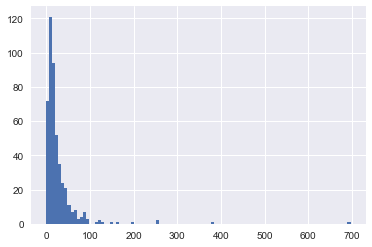

In [120]:
plt.hist(analysis,bins=100)

In [78]:
sns.distplot?

In [110]:
import pandas as pd
import geopandas as gp
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

### Plotting Absolute Value of the Weighted Percent Error

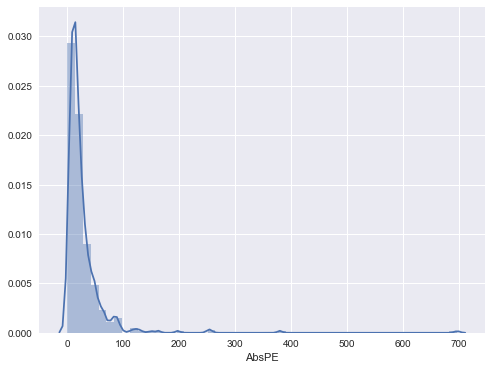

In [122]:
ax=sns.distplot(analysis)
ax.figure.set_size_inches(8,6)
#ax.set_xlim(-0.2,0.5)

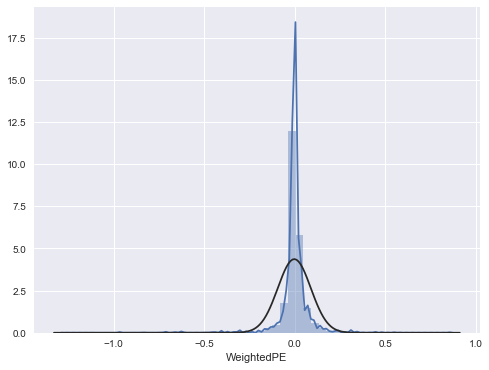

In [112]:
ax=sns.distplot(estimation_result2['WeightedPE'],kde=True,fit=stats.norm)
ax.figure.set_size_inches(8,6)
#ax.set_xlim(-0.,0.5)

## Project level Accuracy
Group by Project Internal ID and then sum 